# Analysis Of The Temperature Record Of Meteorological Stations In The Highlands And Coast Of Peru

## Code table of contents
* [Introduction: Problem definition](#introduction)
* [Data](#data)
* [Methodology](#methodology)
    * [Summarize Data](#summarize)
    * [Prepare Data](#prepare)
    * [Visualize data](#visualize)
* [Complete code](#code)

## 1   Introduction <a name="introduction"></a>

The analysis occurs in **Peru**. Peru is in the west of South America; its territory comprises diverse landscapes: the valleys, plateaus, and high peaks of the Andes unfold to the west towards the desert coast and the east towards the Amazon.
Peru is one of the countries with the most incredible biological diversity and the world's most significant mineral resources. 

**1.1 The problem.**

**Perú is a country vulnerable to the impacts of climate change**.
The uncertainties about the impacts of climate change in Peru are associated, among other things, with inadequate cultural practices (deforestation, change in land use, etc.) and with configurations of the relief such as the presence of the Andes Mountains, that generates in this territory a diversity of climates and micro-climates. Both significantly impact the local climate's behavior with very varied responses to global climate change.

The purpose of this project is to analyze the data from some meteorological stations of the National Meteorology and Hydrology Service of Peru - SENAMHI, and to be able to show temperature changes and thus become more aware of what has been happening in recent decades.

## 2   Data <a name="data"></a>

* The hydrometeorological data needed is gathering from the SENAMHI meteorological stations, available on its web portal for the analysis. https://www.senamhi.gob.pe/?&p=descarga-datos-hidrometeorologicos

* Each hydrometeorological station presents daily temperature and precipitation data. We will take, for example, the Matucana station. However, not all stations present complete data, mainly missing temperature data or being these in a short period, for example, 2003 - 2014.

* For this reason, the data was taken from stations that will present the temperature data and in prolonged periods and that in turn are representative.


## 3 Methodology <a name="methodology"></a>

The data obtained from each meteorological station is sent as a **text file** and presents the daily data on precipitation, maximum temperature, and minimum temperature.
We will show the data from the **Matucana station**.

In [1]:
# Load libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### 3.1 Summarize Data <a name="summarize"></a>

In [2]:
df = pd.read_csv('Matucana.txt', sep=" ", header=None)
df.columns = ["Year", "Month", "Day", "Precipitation", "Tmax", "Tmin"]

Let's see how it looks like

In [3]:
# Summarize Data
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18901 entries, 0 to 18900
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           18901 non-null  int64  
 1   Month          18901 non-null  int64  
 2   Day            18901 non-null  int64  
 3   Precipitation  18901 non-null  float64
 4   Tmax           18901 non-null  float64
 5   Tmin           18901 non-null  float64
dtypes: float64(3), int64(3)
memory usage: 886.1 KB
None


,Year,Month,Day,Precipitation,Tmax,Tmin
0,1964,2,1,0.0,21.6,12.8
1,1964,2,2,0.9,20.6,11.6
2,1964,2,3,5.8,18.6,12.6
3,1964,2,4,0.2,21.2,13.2
4,1964,2,5,4.1,19.4,12.2


Checking the Minimum values in the descriptive statistics, we see -99.90, which possibly means missing data.

In [4]:
# Descriptive statistics
np.round(df.describe(), 2)

,Year,Month,Day,Precipitation,Tmax,Tmin
count,18901.00,18901.00,18901.00,18901.00,18901.00,18901.00
mean,1989.46,6.52,15.73,-3.13,16.69,6.57
std,14.94,3.44,8.80,19.65,21.99,19.35
min,1964.00,1.00,1.00,-99.90,-99.90,-99.90
25%,1977.00,4.00,8.00,0.00,19.70,8.90
50%,1989.00,7.00,16.00,0.00,21.00,10.20
75%,2002.00,9.00,23.00,0.00,21.90,11.20
max,2015.00,12.00,31.00,35.20,28.00,14.80


### 3.2 Prepare Data <a name="prepare"></a>  

We are going to use year, month, and maximum temperature (Celsius). The "-99.90" data will be treated as NaN

In [5]:
df1 = df
df1 = df1[df1.Tmax != -99.9]

In [6]:
# Indexing and mean
df1 = df1.loc[:, ['Year', 'Month', 'Tmax']]
df_indexed = df1.groupby(['Year', 'Month']).mean()
df_indexed.head(15)

Tmax
Year Month           
1964 2      19.193103
     3      19.000000
     4      18.733333
     5      20.245161
     6      19.073333
     7      19.251613
     8      19.878571
     9      20.360000
     10     20.012903
     11     20.706667
     12     18.683871
1965 1      18.806452
     2      18.828571
     3      19.187097
     4      19.446667

In [7]:
# Unstack table
df_indexed_table = df_indexed.unstack(level=0)
df_indexed_table_up = df_indexed_table.iloc[::-1]
df_indexed_table_up

Tmax                                                         \
Year        1964       1965       1966       1967       1968       1969   
Month                                                                     
12     18.683871  20.678571  19.235484  21.341935        NaN  19.722581   
11     20.706667  20.866667  20.233333  20.286667        NaN  20.460000   
10     20.012903  21.161290  19.754839  20.606452        NaN  21.077419   
9      20.360000  20.780000  20.753333  21.040000        NaN  21.392593   
8      19.878571  19.892857  20.574194  20.735484        NaN  20.535484   
7      19.251613  20.651613  20.019355  19.954839        NaN  21.000000   
6      19.073333  20.606667  19.773333  19.746667        NaN  20.760000   
5      20.245161  19.890323  20.077419  20.521429  19.700000  21.709677   
4      18.733333  19.446667  20.133333  19.260000  20.066667  20.806667   
3      19.000000  19.187097  19.535484  17.180645  18.892857  20.025806   
2      19.193103  18.828571  20.821429  16.900000  19.489655  19.642857   
1            NaN  18.806452  20.535484  17.819355  20.174194  20.470968   

                                                   ...                        \
Year        1970       1971       1972       1973  ...       2006       2007   
Month                                              ...                         
12     19.987097  19.161290  21.400000  18.677419  ...  20.000000  19.980645   
11     20.066667  20.846667  22.026667  20.840000  ...  21.303333  21.633333   
10     20.657143  21.103226  21.774194  20.171429  ...  22.093548  21.587097   
9      20.606667  21.051852  21.733333  20.900000  ...  22.220000  22.816667   
8      20.483871  20.600000  21.245161  20.783871  ...  21.958065  21.441935   
7      20.042857  20.548387  21.470968  20.729032  ...  22.103333  21.280645   
6      20.746667  19.773333  20.840000  20.930769  ...  21.473333  21.003333   
5      19.632258  20.671429  21.021429  20.722581  ...  21.154839  20.887097   
4      20.446667  19.088889  20.426667  21.148148  ...  19.500000  19.436667   
3      20.006452  17.716129  18.090323  20.274074  ...  19.167742  19.293548   
2      19.689286  18.307143  19.213793  21.185714  ...  19.142857  20.196429   
1      18.574194  18.277419  19.316129  20.464286  ...  19.958065  20.567742   

                                                                         \
Year        2008       2009       2010       2011       2012       2013   
Month                                                                     
12     20.006452  20.709677  19.109677  20.112903  20.400000  20.480645   
11     20.796552  21.420000  21.646667  21.556667  20.830000  21.113333   
10     21.951613  22.490000  22.058065  22.229032  21.848387  21.929032   
9      22.690000  23.400000  22.473333  23.363333  23.053333  22.473333   
8      21.296774  22.835484  22.303226  22.932258  23.293548  21.709677   
7      21.335484  22.187097  21.516129        NaN  22.586667  21.254839   
6      21.216667  22.100000  21.683333  22.106667  22.160000  21.306667   
5      20.487097  21.593103  22.790323  21.906452  22.000000  20.637931   
4      19.550000  19.680000  21.833333  19.883333  19.920000  21.606667   
3      18.087097  18.596774  20.890323  19.996774  20.067742  20.140741   
2      17.827586  18.348148  21.160714  20.210714  18.968966  19.603571   
1      17.919355  18.886667  20.936667  19.551613  20.845161  21.813793   

                             
Year        2014       2015  
Month                        
12     20.277419        NaN  
11     21.610000        NaN  
10     22.383871  23.574194  
9      22.350000  23.570000  
8      21.767742  23.003226  
7      22.206452  22.306452  
6      21.866667  22.440000  
5      21.464516  22.100000  
4      21.696667  21.396667  
3      19.170968  20.016129  
2      20.078571  20.007143  
1      20.454839  21.029032  

[12 rows x 52 columns]

### 3.3 Visualize data <a name="visualize"></a>   

In **Table 1**, the information of the Matucana station is presented by months for each year. The white spots mean missing data.


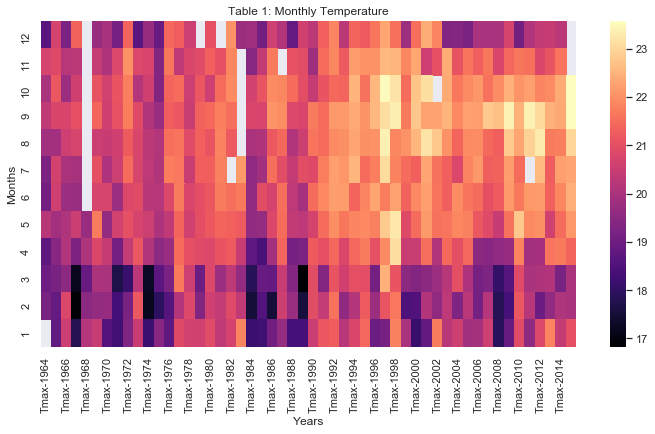

In [8]:
# Table 1
fig, ax = plt.subplots(figsize=(12, 6))
sns.heatmap(df_indexed_table_up, cmap='magma')
plt.title("Table 1: Monthly Temperature")
plt.xlabel("Years")        
plt.ylabel("Months") 
plt.show()

In **Table 2**, the information of the Matucana station is presented by the annual average maximum temperature.

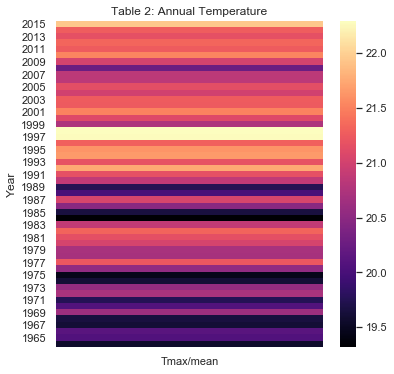

In [9]:
# Table 2
df_anual_mean = df_indexed.groupby(level='Year').mean()
df_anual_mean = df_anual_mean.rename(columns={'Tmax': 'Tmax/mean'})
df_anual_mean_up = df_anual_mean.iloc[::-1]

fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(df_anual_mean_up, cmap='magma')
plt.title("Table 2: Annual Temperature") 
plt.show()

It's necessary to corroborate our first sights with more objective information as the correlation between temperature variation through time (years). 
The correlation goes from perfect (-1 or 1) to null (0), being in this case 0.62.
There is a correlation.


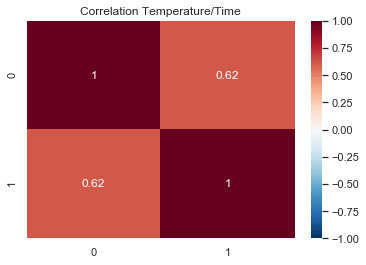

In [10]:
# Correlation
sns.heatmap(np.round(np.corrcoef(df_anual_mean.index, df_anual_mean['Tmax/mean']), 2),vmin=-1, vmax=1, cmap='RdBu_r', annot=True)
plt.title("Correlation Temperature/Time") 
plt.show()

In **Table 3**, the information of the Matucana station is presented by a regression line.

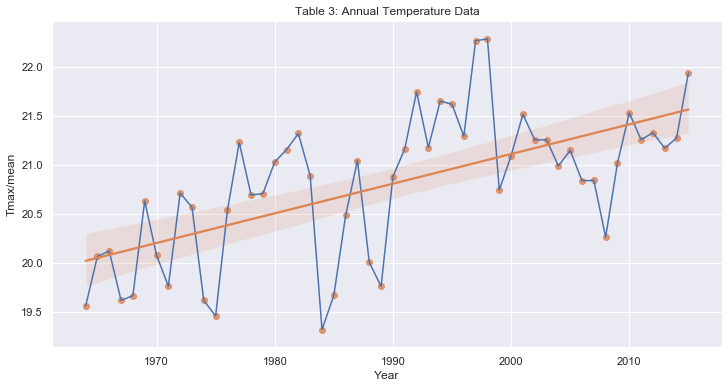

In [11]:
# Line regression
fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(df_anual_mean.index, df_anual_mean['Tmax/mean'])
sns.regplot(df_anual_mean.index, df_anual_mean['Tmax/mean'])
plt.title("Table 3: Annual Temperature Data")
plt.show()

## 4 Complete code <a name="code"></a>   

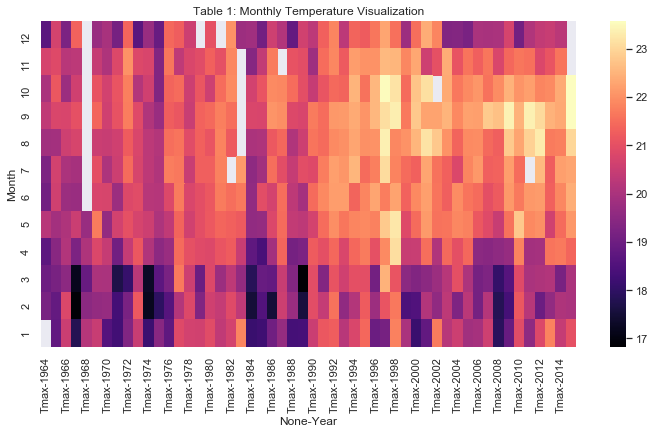

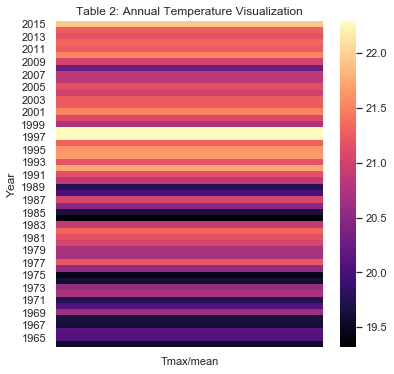

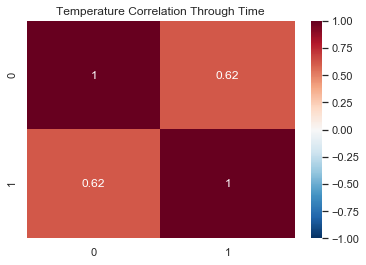

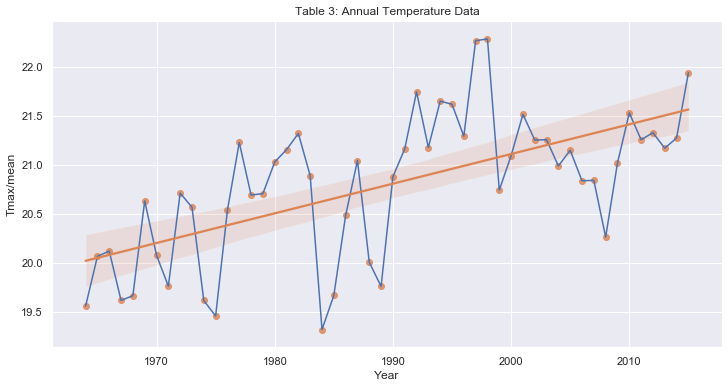

In [12]:
## Load libraries ##
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### Load dataset ###
df = pd.read_csv('Matucana.txt', sep=" ", header=None)
df.columns = ["Year", "Month", "Day", "Precipitation", "Tmax", "Tmin"]

### Prepare data ###
df1 = df
df1 = df1[df1.Tmax != -99.9]
# Indexing and mean
df1 = df1.loc[:, ['Year', 'Month', 'Tmax']]
df_indexed = df1.groupby(['Year', 'Month']).mean()
# Define for table 1: Unstack table
df_indexed_table = df_indexed.unstack(level=0)
df_indexed_table_up = df_indexed_table.iloc[::-1]
# Define for table 2 and 3
df_anual_mean = df_indexed.groupby(level='Year').mean()
df_anual_mean = df_anual_mean.rename(columns={'Tmax': 'Tmax/mean'})
df_anual_mean_up = df_anual_mean.iloc[::-1]

### Visualize data ###
# Table 1: by month and year
fig, ax = plt.subplots(figsize=(12, 6))
sns.heatmap(df_indexed_table_up, cmap='magma')
plt.title("Table 1: Monthly Temperature Visualization")
plt.show()
# Table 2: by year mean
fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(df_anual_mean_up, cmap='magma')
plt.title("Table 2: Annual Temperature Visualization")
plt.show()
# Correlation: 
sns.heatmap(np.round(np.corrcoef(df_anual_mean.index, df_anual_mean['Tmax/mean']), 2),vmin=-1, vmax=1, cmap='RdBu_r', annot=True)
plt.title("Temperature Correlation Through Time")
plt.show()
# Table 3: by year mean and projection
fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(df_anual_mean.index, df_anual_mean['Tmax/mean'])
sns.regplot(df_anual_mean.index, df_anual_mean['Tmax/mean'])
plt.title("Table 3: Annual Temperature Data")
plt.show()